In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit

import json
with open('../../data/corticalRegion2region.json', 'r') as f:
    corticalRegion2region = json.load(f)

corticalRegion2region['LI'] = 'LIN'
corticalRegion2region['VIS'] = 'VIS'

def linear_function(x, a, b):
    return a * x + b

In [2]:
psd_df = pd.read_csv('../../data/heatmap-PSD95_Density.csv', sep=',')
psd_df.fillna(0, inplace=True)
psd_df = psd_df[(psd_df['AGE']<=99)&(psd_df['AGE']>=60)]
psd_df.drop('AGE', inplace=True, axis=1)
psd_df = psd_df.iloc[:, 13:]
# psd_df.reset_index(inplace=True, drop=True)
psd_df

,Cerebellum_ANcr1gr,Cerebellum_ANcr1mo,Cerebellum_ANcr2gr,Cerebellum_ANcr2mo,Cerebellum_CENT2gr,Cerebellum_CENT2mo,Cerebellum_CENT3gr,Cerebellum_CENT3mo,Cerebellum_COPYgr,Cerebellum_COPYmo,...,Thalamus_LP,Thalamus_PF,Thalamus_PO,Thalamus_RT,Thalamus_SPFp,Thalamus_VAL,Thalamus_VM,Thalamus_VPL,Thalamus_VPM,Thalamus_VPMpc
25,39.790000,36.113750,33.73500,42.601250,0.000000,0.000000,31.356250,42.817500,34.383750,45.196250,...,66.948715,0.000000,59.789459,18.768859,0.000000,0.000000,0.000000,54.178151,53.210684,0.000000
26,33.748706,47.166866,0.00000,0.000000,0.000000,0.000000,32.393336,37.950352,34.155317,47.166866,...,74.861682,0.000000,74.572641,25.724671,23.701382,67.202089,56.218522,54.050713,58.675373,0.000000
27,0.000000,0.000000,29.84493,36.055435,0.000000,0.000000,26.912191,30.707500,0.000000,0.000000,...,43.283621,0.000000,50.728140,15.284323,16.733698,40.055466,33.269754,34.916772,41.373080,0.000000
28,0.000000,0.000000,29.19375,38.925000,0.000000,0.000000,24.868750,37.627500,0.000000,0.000000,...,70.065000,0.000000,77.850000,21.841250,24.220000,0.000000,0.000000,46.493750,57.738750,0.000000
29,0.000000,0.000000,0.00000,0.000000,25.517500,30.058750,27.031250,28.761250,0.000000,0.000000,...,63.793750,0.000000,70.497500,19.462500,21.192500,0.000000,0.000000,53.521875,54.062500,0.000000
30,0.000000,0.000000,34.38375,40.222500,0.000000,0.000000,39.249375,41.520000,0.000000,0.000000,...,72.119375,0.000000,88.878750,24.868750,25.085000,64.658750,47.250625,49.088750,64.658750,0.000000
31,0.000000,0.000000,0.00000,0.000000,33.974962,35.306324,38.389169,38.072976,0.000000,0.000000,...,53.984824,59.037248,67.912231,19.202892,18.104008,51.075741,45.389098,48.817898,65.657740,61.211425
32,0.000000,0.000000,39.14125,49.521250,0.000000,0.000000,44.604010,47.911389,39.141250,46.493750,...,64.297182,0.000000,84.188986,21.785779,24.944589,61.166097,51.995042,54.767479,70.068964,0.000000
33,35.897500,41.790312,36.54625,40.114375,0.000000,0.000000,34.708125,33.032187,33.518750,40.655000,...,73.365578,0.000000,76.533019,21.360717,21.348932,0.000000,0.000000,57.693500,64.353787,0.000000
34,37.195000,44.331250,37.84375,49.305000,0.000000,0.000000,36.330000,36.978750,39.573750,43.898750,...,59.036250,0.000000,72.443750,19.678750,19.570625,0.000000,0.000000,47.358750,58.387500,0.000000


In [3]:
psd_df = psd_df.mask(psd_df == 0)
psd_df

,Cerebellum_ANcr1gr,Cerebellum_ANcr1mo,Cerebellum_ANcr2gr,Cerebellum_ANcr2mo,Cerebellum_CENT2gr,Cerebellum_CENT2mo,Cerebellum_CENT3gr,Cerebellum_CENT3mo,Cerebellum_COPYgr,Cerebellum_COPYmo,...,Thalamus_LP,Thalamus_PF,Thalamus_PO,Thalamus_RT,Thalamus_SPFp,Thalamus_VAL,Thalamus_VM,Thalamus_VPL,Thalamus_VPM,Thalamus_VPMpc
25,39.790000,36.113750,33.73500,42.601250,NaN,NaN,31.356250,42.817500,34.383750,45.196250,...,66.948715,NaN,59.789459,18.768859,NaN,NaN,NaN,54.178151,53.210684,NaN
26,33.748706,47.166866,NaN,NaN,NaN,NaN,32.393336,37.950352,34.155317,47.166866,...,74.861682,NaN,74.572641,25.724671,23.701382,67.202089,56.218522,54.050713,58.675373,NaN
27,NaN,NaN,29.84493,36.055435,NaN,NaN,26.912191,30.707500,NaN,NaN,...,43.283621,NaN,50.728140,15.284323,16.733698,40.055466,33.269754,34.916772,41.373080,NaN
28,NaN,NaN,29.19375,38.925000,NaN,NaN,24.868750,37.627500,NaN,NaN,...,70.065000,NaN,77.850000,21.841250,24.220000,NaN,NaN,46.493750,57.738750,NaN
29,NaN,NaN,NaN,NaN,25.517500,30.058750,27.031250,28.761250,NaN,NaN,...,63.793750,NaN,70.497500,19.462500,21.192500,NaN,NaN,53.521875,54.062500,NaN
30,NaN,NaN,34.38375,40.222500,NaN,NaN,39.249375,41.520000,NaN,NaN,...,72.119375,NaN,88.878750,24.868750,25.085000,64.658750,47.250625,49.088750,64.658750,NaN
31,NaN,NaN,NaN,NaN,33.974962,35.306324,38.389169,38.072976,NaN,NaN,...,53.984824,59.037248,67.912231,19.202892,18.104008,51.075741,45.389098,48.817898,65.657740,61.211425
32,NaN,NaN,39.14125,49.521250,NaN,NaN,44.604010,47.911389,39.141250,46.493750,...,64.297182,NaN,84.188986,21.785779,24.944589,61.166097,51.995042,54.767479,70.068964,NaN
33,35.897500,41.790312,36.54625,40.114375,NaN,NaN,34.708125,33.032187,33.518750,40.655000,...,73.365578,NaN,76.533019,21.360717,21.348932,NaN,NaN,57.693500,64.353787,NaN
34,37.195000,44.331250,37.84375,49.305000,NaN,NaN,36.330000,36.978750,39.573750,43.898750,...,59.036250,NaN,72.443750,19.678750,19.570625,NaN,NaN,47.358750,58.387500,NaN


In [4]:
psd_df = psd_df.loc[:, psd_df.isna().sum() <= 9]
psd_df

,Cerebellum_ANcr1gr,Cerebellum_ANcr1mo,Cerebellum_ANcr2gr,Cerebellum_ANcr2mo,Cerebellum_CENT2gr,Cerebellum_CENT2mo,Cerebellum_CENT3gr,Cerebellum_CENT3mo,Cerebellum_COPYgr,Cerebellum_COPYmo,...,Thalamus_AV,Thalamus_LD,Thalamus_LP,Thalamus_PO,Thalamus_RT,Thalamus_SPFp,Thalamus_VAL,Thalamus_VM,Thalamus_VPL,Thalamus_VPM
25,39.790000,36.113750,33.73500,42.601250,NaN,NaN,31.356250,42.817500,34.383750,45.196250,...,NaN,67.335702,66.948715,59.789459,18.768859,NaN,NaN,NaN,54.178151,53.210684
26,33.748706,47.166866,NaN,NaN,NaN,NaN,32.393336,37.950352,34.155317,47.166866,...,55.495919,71.826749,74.861682,74.572641,25.724671,23.701382,67.202089,56.218522,54.050713,58.675373
27,NaN,NaN,29.84493,36.055435,NaN,NaN,26.912191,30.707500,NaN,NaN,...,34.785010,43.876547,43.283621,50.728140,15.284323,16.733698,40.055466,33.269754,34.916772,41.373080
28,NaN,NaN,29.19375,38.925000,NaN,NaN,24.868750,37.627500,NaN,NaN,...,NaN,72.227500,70.065000,77.850000,21.841250,24.220000,NaN,NaN,46.493750,57.738750
29,NaN,NaN,NaN,NaN,25.517500,30.058750,27.031250,28.761250,NaN,NaN,...,NaN,63.793750,63.793750,70.497500,19.462500,21.192500,NaN,NaN,53.521875,54.062500
30,NaN,NaN,34.38375,40.222500,NaN,NaN,39.249375,41.520000,NaN,NaN,...,55.576250,75.471250,72.119375,88.878750,24.868750,25.085000,64.658750,47.250625,49.088750,64.658750
31,NaN,NaN,NaN,NaN,33.974962,35.306324,38.389169,38.072976,NaN,NaN,...,52.685036,62.320742,53.984824,67.912231,19.202892,18.104008,51.075741,45.389098,48.817898,65.657740
32,NaN,NaN,39.14125,49.521250,NaN,NaN,44.604010,47.911389,39.141250,46.493750,...,48.338991,70.472399,64.297182,84.188986,21.785779,24.944589,61.166097,51.995042,54.767479,70.068964
33,35.897500,41.790312,36.54625,40.114375,NaN,NaN,34.708125,33.032187,33.518750,40.655000,...,NaN,69.543787,73.365578,76.533019,21.360717,21.348932,NaN,NaN,57.693500,64.353787
34,37.195000,44.331250,37.84375,49.305000,NaN,NaN,36.330000,36.978750,39.573750,43.898750,...,NaN,64.442500,59.036250,72.443750,19.678750,19.570625,NaN,NaN,47.358750,58.387500


In [5]:
psd_df_mean = pd.DataFrame(psd_df.mean(axis=0), columns = ['psd_counts'])
psd_df_mean.index = [i.split('_')[1] for i in psd_df_mean.index]
psd_df_mean.reset_index(inplace=True)
psd_df_mean.columns = ['ori_region', 'psd_counts']

cur_regions = []
for i in psd_df_mean.index:
    tmp = psd_df_mean.loc[i, 'ori_region']
    if tmp in list(corticalRegion2region.keys()):
        cur_regions.append(corticalRegion2region[tmp])
    else:
        try:
            for j in corticalRegion2region.values():
                if tmp.startswith(j):
                    print('tmp: ',tmp, '  j: ',j)
                    cur_regions.append(j)
                    break

        except:
            cur_regions.append(tmp)
            
psd_df_mean['region'] = cur_regions

tmp:  DGgrInf   j:  DG
tmp:  DGgrSup   j:  DG
tmp:  DGmoInf   j:  DG
tmp:  DGmoSup   j:  DG
tmp:  DGpo   j:  DG
tmp:  PTLp   j:  PT
tmp:  SOL   j:  SO
tmp:  ACBc   j:  ACB
tmp:  ACBsh   j:  ACB


In [6]:
psd_df_mean

,ori_region,psd_counts,region
0,ANcr1gr,36.332741,AN
1,ANcr1mo,43.265686,AN
2,ANcr2gr,34.816554,AN
3,ANcr2mo,43.445445,AN
4,CENT2gr,29.746231,CENT
...,...,...,...
134,SPFp,21.544448,SPFp
135,VAL,56.831629,VAL
136,VM,46.824608,VM
137,VPL,50.508990,VPL


In [7]:
psd_df_mean = psd_df_mean[['psd_counts', 'region']].groupby('region').mean()
psd_df_mean

,psd_counts
region,
ACB,77.305377
AMB,16.744495
AN,39.465106
AOB,46.659019
AON,95.321596
...,...
VIS,98.418648
VM,46.824608
VPL,50.508990


In [8]:
sap_df = pd.read_csv('../../data/heatmap-SAP102_Density.csv', sep=',')
sap_df.fillna(0, inplace=True)
sap_df = sap_df[(sap_df['AGE']<=99)&(sap_df['AGE']>=60)]
sap_df.drop('AGE', inplace=True, axis=1)
sap_df = sap_df.iloc[:, 13:]
# sap_df.reset_index(inplace=True, drop=True)

sap_df = sap_df.mask(sap_df == 0)
sap_df = sap_df.loc[:, sap_df.isna().sum() <= 9]

sap_df_mean = pd.DataFrame(sap_df.mean(axis=0), columns = ['sap_counts'])
sap_df_mean.index = [i.split('_')[1] for i in sap_df_mean.index]
sap_df_mean.reset_index(inplace=True)
sap_df_mean.columns = ['ori_region', 'sap_counts']

cur_regions = []
for i in sap_df_mean.index:
    tmp = sap_df_mean.loc[i, 'ori_region']
    if tmp in list(corticalRegion2region.keys()):
        cur_regions.append(corticalRegion2region[tmp])
    else:
        try:
            for j in corticalRegion2region.values():
                if tmp.startswith(j):
                    print('tmp: ',tmp, '  j: ',j)
                    cur_regions.append(j)
                    break
        except:
            cur_regions.append(tmp)
                             
sap_df_mean['region'] = cur_regions
# sap_df_mean.set_index('region', inplace=True)
sap_df_mean

tmp:  DGgrInf   j:  DG
tmp:  DGgrSup   j:  DG
tmp:  DGmoInf   j:  DG
tmp:  DGmoSup   j:  DG
tmp:  DGpo   j:  DG
tmp:  PTLp   j:  PT
tmp:  SOL   j:  SO
tmp:  ACBc   j:  ACB
tmp:  ACBsh   j:  ACB


,ori_region,sap_counts,region
0,ANcr1gr,27.766500,AN
1,ANcr1mo,20.024750,AN
2,ANcr2gr,30.989826,AN
3,ANcr2mo,26.238333,AN
4,CENT2gr,16.597188,CENT
...,...,...,...
134,SPFp,6.728979,SPFp
135,VAL,64.118125,VAL
136,VM,48.050750,VM
137,VPL,53.421941,VPL


In [9]:
sap_df_mean = sap_df_mean[['sap_counts', 'region']].groupby('region').mean()
sap_df_mean

,sap_counts
region,
ACB,72.176510
AMB,7.798516
AN,26.254852
AOB,50.836771
AON,95.789740
...,...
VIS,78.242727
VM,48.050750
VPL,53.421941


In [10]:
syn_df = pd.concat([psd_df_mean, sap_df_mean], axis=1)
syn_df

,psd_counts,sap_counts
region,,
ACB,77.305377,72.176510
AMB,16.744495,7.798516
AN,39.465106,26.254852
AOB,46.659019,50.836771
AON,95.321596,95.789740
...,...,...
VIS,98.418648,78.242727
VM,46.824608,48.050750
VPL,50.508990,53.421941


In [11]:
syn_df['combine_synapse'] = syn_df['psd_counts'] + syn_df['sap_counts']
syn_df

,psd_counts,sap_counts,combine_synapse
region,,,
ACB,77.305377,72.176510,149.481887
AMB,16.744495,7.798516,24.543011
AN,39.465106,26.254852,65.719959
AOB,46.659019,50.836771,97.495790
AON,95.321596,95.789740,191.111335
...,...,...,...
VIS,98.418648,78.242727,176.661375
VM,46.824608,48.050750,94.875358
VPL,50.508990,53.421941,103.930931


In [12]:
syn_df = syn_df['combine_synapse'].to_frame().T
syn_df

region,ACB,AMB,AN,AOB,AON,APN,AV,BST,CA1,CA2,...,SUV,UVU,V,VAL,VII,VIS,VM,VPL,VPM,ZI
combine_synapse,149.481887,24.543011,65.719959,97.49579,191.111335,29.613242,99.924679,46.071454,210.328454,177.545067,...,13.931624,62.990573,12.740875,120.949754,18.253305,176.661375,94.875358,103.930931,130.856292,23.461506


In [13]:
region_sim = pd.read_csv('../../data/eucl_region_similarity_using174_region.csv', sep=',', index_col=0)

region_sim

,FRP,MOp,MOs,SSp-n,SSp-bfd,SSp-ll,SSp-m,SSp-ul,SSp-tr,SSp-un,...,SPIV,CENT,CUL,DEC,FOTU,SIM,AN,COPY,PFL,FL
FRP,1.000000,0.701205,0.746701,0.760539,0.791235,0.676851,0.739575,0.647752,0.746334,0.736902,...,0.134753,0.302799,0.154543,0.083386,0.052803,0.299386,0.093394,0.076032,0.118016,0.070755
MOp,0.701205,1.000000,0.874966,0.817356,0.795955,0.786861,0.918361,0.879372,0.637598,0.794357,...,0.106974,0.234783,0.134376,0.068398,0.048277,0.279184,0.077648,0.059424,0.129291,0.058719
MOs,0.746701,0.874966,1.000000,0.869013,0.884186,0.851463,0.915525,0.837040,0.713349,0.894804,...,0.116122,0.257584,0.142511,0.072146,0.050072,0.291861,0.082741,0.064222,0.117162,0.062239
SSp-n,0.760539,0.817356,0.869013,1.000000,0.900155,0.802306,0.873557,0.792269,0.751525,0.865196,...,0.120854,0.265055,0.146522,0.072817,0.050975,0.305422,0.085317,0.066640,0.113474,0.066466
SSp-bfd,0.791235,0.795955,0.884186,0.900155,1.000000,0.810548,0.852457,0.770874,0.775751,0.895481,...,0.126289,0.283654,0.154039,0.078130,0.052340,0.309706,0.089718,0.068243,0.112104,0.066529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SIM,0.299386,0.279184,0.291861,0.305422,0.309706,0.311342,0.293598,0.291249,0.330487,0.299581,...,0.097678,0.220708,0.217350,0.084030,0.094220,1.000000,0.099072,0.041921,0.083254,0.057002
AN,0.093394,0.077648,0.082741,0.085317,0.089718,0.079552,0.080415,0.076875,0.094590,0.083111,...,0.318483,0.240166,0.141139,0.079462,0.079608,0.099072,1.000000,0.043231,0.034422,0.063730
COPY,0.076032,0.059424,0.064222,0.066640,0.068243,0.060793,0.061972,0.054752,0.075859,0.066175,...,0.124652,0.100852,0.043797,0.029805,0.021443,0.041921,0.043231,1.000000,0.020892,0.174615
PFL,0.118016,0.129291,0.117162,0.113474,0.112104,0.108920,0.123260,0.122335,0.093388,0.105935,...,0.036082,0.060628,0.048743,0.027647,0.035144,0.083254,0.034422,0.020892,1.000000,0.025671


In [14]:
shared_region = list(set(syn_df.columns).intersection(region_sim.index))
print(len(shared_region))

64


In [15]:
sele_list = list(np.unique(syn_df.columns))
eucl_df = pd.DataFrame(np.zeros((len(sele_list), len(sele_list))), 
                       index = (sele_list), columns=(sele_list)
                      )

for i in sele_list:
    for j in sele_list:
        eucl_df.loc[i,j] = np.linalg.norm(syn_df[i] - syn_df[j])

eucl_df

,ACB,AMB,AN,AOB,AON,APN,AV,BST,CA1,CA2,...,SUV,UVU,V,VAL,VII,VIS,VM,VPL,VPM,ZI
ACB,0.000000,124.938876,83.761928,51.986097,41.629448,119.868645,49.557208,103.410433,60.846567,28.063179,...,135.550263,86.491314,136.741012,28.532133,131.228582,27.179488,54.606529,45.550956,18.625595,126.020381
AMB,124.938876,0.000000,41.176948,72.952779,166.568324,5.070232,75.381668,21.528443,185.785443,153.002056,...,10.611387,38.447562,11.802135,96.406743,6.289706,152.118364,70.332348,79.387920,106.313281,1.081504
AN,83.761928,41.176948,0.000000,31.775831,125.391376,36.106716,34.204720,19.648505,144.608495,111.825108,...,51.788335,2.729386,52.979084,55.229795,47.466654,110.941416,29.155399,38.210972,65.136333,42.258453
AOB,51.986097,72.952779,31.775831,0.000000,93.615545,67.882547,2.428889,51.424336,112.832664,80.049277,...,83.564166,34.505217,84.754915,23.453964,79.242485,79.165585,2.620432,6.435141,33.360502,74.034284
AON,41.629448,166.568324,125.391376,93.615545,0.000000,161.498093,91.186656,145.039881,19.217119,13.566269,...,177.179711,128.120762,178.370460,70.161581,172.858030,14.449960,96.235977,87.180404,60.255043,167.649829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIS,27.179488,152.118364,110.941416,79.165585,14.449960,147.048133,76.736696,130.589921,33.667079,0.883692,...,162.729751,113.670802,163.920500,55.711621,158.408070,0.000000,81.786017,72.730444,45.805083,153.199869
VM,54.606529,70.332348,29.155399,2.620432,96.235977,65.262116,5.049321,48.803905,115.453096,82.669708,...,80.943734,31.884786,82.134483,26.074396,76.622053,81.786017,0.000000,9.055573,35.980934,71.413852
VPL,45.550956,79.387920,38.210972,6.435141,87.180404,74.317689,4.006252,57.859477,106.397523,73.614135,...,89.999307,40.940358,91.190056,17.018823,85.677626,72.730444,9.055573,0.000000,26.925361,80.469425
VPM,18.625595,106.313281,65.136333,33.360502,60.255043,101.243050,30.931613,84.784838,79.472162,46.688775,...,116.924668,67.865719,118.115417,9.906538,112.602987,45.805083,35.980934,26.925361,0.000000,107.394786


62.33961139100336 44.603215475557285 201.47538487056684


,ACB,AMB,AN,AOB,AON,APN,AV,BST,CA1,CA2,...,SUV,UVU,V,VAL,VII,VIS,VM,VPL,VPM,ZI
ACB,1.000000,0.060742,0.152906,0.311759,0.393243,0.068055,0.329207,0.098426,0.255592,0.533032,...,0.047882,0.143829,0.046620,0.527457,0.052753,0.543698,0.293971,0.360145,0.658636,0.059287
AMB,0.060742,1.000000,0.397252,0.194836,0.023886,0.892549,0.184510,0.617136,0.015525,0.032377,...,0.788277,0.422320,0.767511,0.115160,0.868477,0.033025,0.206626,0.168660,0.092224,0.976044
AN,0.152906,0.397252,1.000000,0.490460,0.060129,0.445076,0.464466,0.643703,0.039081,0.081504,...,0.313145,0.940642,0.304895,0.289892,0.345004,0.083134,0.520138,0.424567,0.232155,0.387736
AOB,0.311759,0.194836,0.490460,1.000000,0.122597,0.218292,0.947001,0.315711,0.079683,0.166178,...,0.153585,0.461347,0.149539,0.591061,0.169211,0.169503,0.942943,0.865649,0.473341,0.190169
AON,0.393243,0.023886,0.060129,0.122597,1.000000,0.026762,0.129458,0.038705,0.649959,0.737747,...,0.018829,0.056560,0.018333,0.207419,0.020745,0.723274,0.115602,0.141624,0.259004,0.023314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIS,0.543698,0.033025,0.083134,0.169503,0.723274,0.037001,0.178989,0.053514,0.470099,0.980383,...,0.026033,0.078200,0.025347,0.286777,0.028682,1.000000,0.159832,0.195810,0.358099,0.032234
VM,0.293971,0.206626,0.520138,0.942943,0.115602,0.231501,0.892967,0.334814,0.075137,0.156696,...,0.162878,0.489264,0.158588,0.557337,0.179450,0.159832,1.000000,0.816258,0.446333,0.201676
VPL,0.360145,0.168660,0.424567,0.865649,0.141624,0.188965,0.914096,0.273295,0.092050,0.191969,...,0.132951,0.399365,0.129448,0.682795,0.146477,0.195810,0.816258,1.000000,0.546804,0.164620
VPM,0.658636,0.092224,0.232155,0.473341,0.259004,0.103327,0.499832,0.149439,0.168342,0.351074,...,0.072698,0.218375,0.070783,0.800832,0.080094,0.358099,0.446333,0.546804,1.000000,0.090015


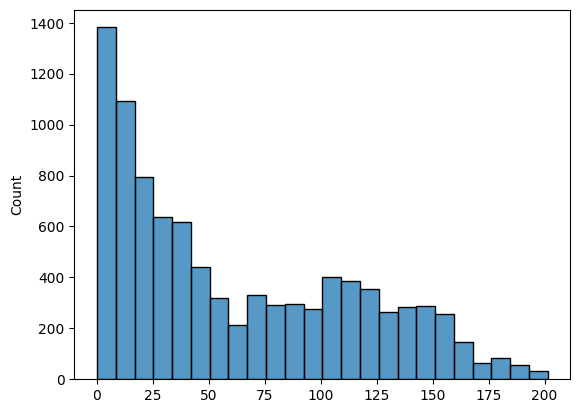

In [16]:
v = eucl_df.values.reshape(-1)
v = v[v>0]
print(np.mean(v), np.median(v), np.max(v))

alpha = np.median(v)

sns.histplot(v)

syn_sim = np.e**(-eucl_df/alpha)
syn_sim

In [17]:
syn_sim.to_csv('../../data/synaptome_region_similarity.csv', sep=',')

In [18]:
region_sim2 = region_sim.loc[shared_region, shared_region].copy()
syn_sim2 = syn_sim.loc[shared_region, shared_region].copy()

In [19]:
cmp_df = pd.DataFrame()
for i in range(0, len(region_sim2)):
    for j in range(0, len(region_sim2)):
        if i < j:
            continue
        cmp_df = pd.concat([cmp_df,
                            pd.DataFrame({'region1': [region_sim2.columns[i]],
                                          'region2': [region_sim2.columns[j]],
                                          'syn_sim': [syn_sim2.iloc[i,j]],
                                          'region_sim': [region_sim2.iloc[i,j]],
                                         })
                           ], axis=0)

cmp_df

,region1,region2,syn_sim,region_sim
0,CLA,CLA,1.000000,1.000000
0,CA2,CLA,0.407635,0.613338
0,CA2,CA2,1.000000,1.000000
0,MV,CLA,0.058953,0.219505
0,MV,CA2,0.024031,0.290087
...,...,...,...,...
0,SUB,SPVO,0.081471,0.403518
0,SUB,IRN,0.065505,0.398946
0,SUB,MOB,0.331057,0.535554
0,SUB,FRP,0.224315,0.497788


In [21]:
cmp_df2 = cmp_df[cmp_df['region1'] != cmp_df['region2']].copy()
cmp_df2

,region1,region2,syn_sim,region_sim
0,CA2,CLA,0.407635,0.613338
0,MV,CLA,0.058953,0.219505
0,MV,CA2,0.024031,0.290087
0,SIM,CLA,0.201885,0.307038
0,SIM,CA2,0.082295,0.333703
...,...,...,...,...
0,SUB,OT,0.924960,0.624011
0,SUB,SPVO,0.081471,0.403518
0,SUB,IRN,0.065505,0.398946
0,SUB,MOB,0.331057,0.535554


In [33]:
th = 0.01
if len(cmp_df2[cmp_df2['syn_sim']<th].copy()) / len(cmp_df2.copy()) > 0.1:
    print(True)
    cmp_df2 = cmp_df2[(cmp_df2['syn_sim']>th)&(cmp_df2['syn_sim']<1)].copy()
else:
    print(False)

if len(cmp_df2[cmp_df2['region_sim']<th].copy()) / len(cmp_df2.copy()) > 0.1:
    print(True)
    cmp_df2 = cmp_df2[(cmp_df2['region_sim']>th)&(cmp_df2['region_sim']<1)].copy()
else:
    print(False)

False
False


In [22]:
cmp_df3 = cmp_df2.copy() #.sample(500)

<Axes: xlabel='syn_sim', ylabel='Count'>

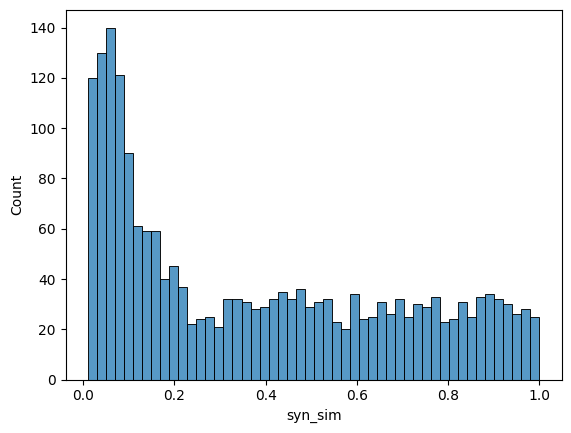

In [23]:
sns.histplot(cmp_df3, bins=50, x='syn_sim')

<Axes: xlabel='region_sim', ylabel='Count'>

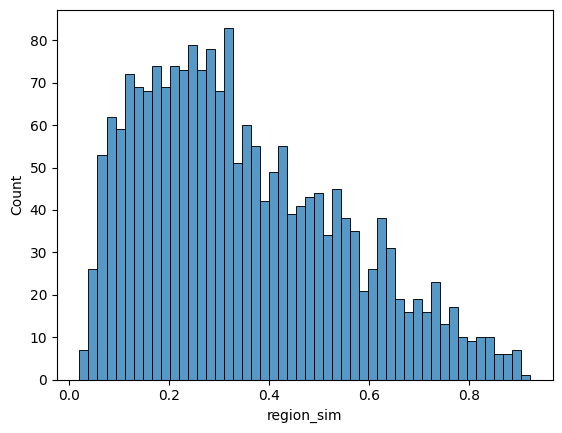

In [24]:
sns.histplot(cmp_df3, bins=50, x='region_sim')

In [25]:
cmp_df3['syn_sim_cat'] = -1
n_bin = 50
for i in list(range(1,n_bin+1))[::-1]:
    cmp_df3.loc[cmp_df3['syn_sim']<=i/n_bin, 'syn_sim_cat'] = i

cmp_df3['region_sim_cat'] = -1
for i in list(range(1,n_bin+1))[::-1]:
    cmp_df3.loc[cmp_df3['region_sim']<=i/n_bin, 'region_sim_cat'] = i

# cmp_df3 = cmp_df3[gene_sim['euc_dis_cat'] != -1].copy()
cmp_df3

,region1,region2,syn_sim,region_sim,syn_sim_cat,region_sim_cat
0,CA2,CLA,0.407635,0.613338,21,31
0,MV,CLA,0.058953,0.219505,3,11
0,MV,CA2,0.024031,0.290087,2,15
0,SIM,CLA,0.201885,0.307038,11,16
0,SIM,CA2,0.082295,0.333703,5,17
...,...,...,...,...,...,...
0,SUB,OT,0.924960,0.624011,47,32
0,SUB,SPVO,0.081471,0.403518,5,21
0,SUB,IRN,0.065505,0.398946,4,20
0,SUB,MOB,0.331057,0.535554,17,27


In [26]:
cross_df = pd.crosstab(cmp_df3['syn_sim_cat'], cmp_df3['region_sim_cat'])

cross_df2 = pd.DataFrame(np.zeros((n_bin, n_bin)),
                         index=range(1, n_bin+1),
                         columns=range(1, n_bin+1)
                        )
cross_df2.index.name = 'syn_sim_cat'
cross_df2.columns.name = 'region_sim_cat'

for i in cross_df.index:
    for j in cross_df.columns:
        cross_df2.loc[i, j] = cross_df.loc[i, j]

# cross_df = cross_df.iloc[::-1,]
cross_df2

region_sim_cat,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
syn_sim_cat,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,5.0,3.0,4.0,5.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,3.0,3.0,6.0,9.0,6.0,5.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,2.0,4.0,6.0,9.0,4.0,6.0,5.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,5.0,5.0,3.0,8.0,3.0,10.0,3.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,2.0,1.0,1.0,4.0,5.0,5.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,1.0,4.0,2.0,1.0,3.0,2.0,2.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,2.0,2.0,1.0,1.0,2.0,3.0,1.0,4.0,5.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,3.0,4.0,3.0,2.0,1.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
import numpy as np
import pandas as pd

masked = np.ma.masked_equal(cross_df2.values, 0)

median = np.ma.median(masked)
mad = np.ma.median(np.abs(masked - median))
robust_z = 0.6745 * (masked - median) / mad

thresh = 3.5
mask_np = np.abs(robust_z.filled(np.nan)) > thresh
mask_df = pd.DataFrame(mask_np,
                      index=cross_df2.index,
                      columns=cross_df2.columns)

idx_pairs = mask_df.stack()[mask_df.stack()].index.tolist()

print(len(idx_pairs))

from scipy.ndimage import uniform_filter

mean_8nb = uniform_filter(cross_df2, size=3, mode='mirror') * 9/8 - cross_df2/8

cross_df2[mask_df] = mean_8nb[mask_df]

0


In [28]:
cmp_df3

,region1,region2,syn_sim,region_sim,syn_sim_cat,region_sim_cat
0,CA2,CLA,0.407635,0.613338,21,31
0,MV,CLA,0.058953,0.219505,3,11
0,MV,CA2,0.024031,0.290087,2,15
0,SIM,CLA,0.201885,0.307038,11,16
0,SIM,CA2,0.082295,0.333703,5,17
...,...,...,...,...,...,...
0,SUB,OT,0.924960,0.624011,47,32
0,SUB,SPVO,0.081471,0.403518,5,21
0,SUB,IRN,0.065505,0.398946,4,20
0,SUB,MOB,0.331057,0.535554,17,27


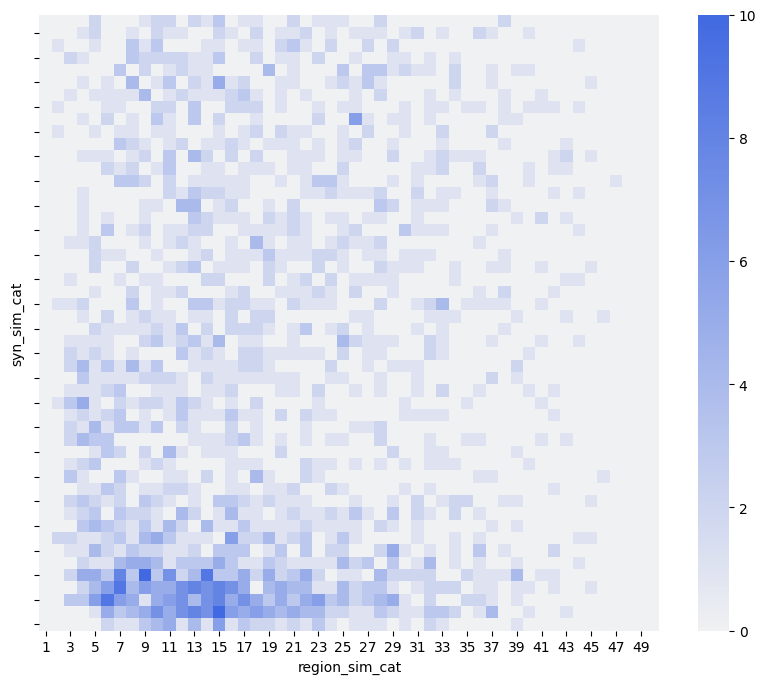

In [29]:
f, ax = plt.subplots(1,1,figsize=(10,8))
sns.heatmap(cross_df2.iloc[::-1, ], 
            cmap=sns.color_palette("light:royalblue", as_cmap=True),
            # mask=cross_df<=0
           )

tick_pos = np.arange(0, n_bin, 2)
plt.xticks(tick_pos+0.5, rotation=0)
plt.yticks(tick_pos+1.5, rotation=0)

# plt.plot(xx_fit_z, yy_fit_z, color='red', 
#          linewidth=2, linestyle='--',
#          label='Fitted Curve')
plt.savefig('./synaptome_ppss.svg', bbox_inches='tight')
plt.show()

<Axes: xlabel='region_sim', ylabel='syn_sim'>

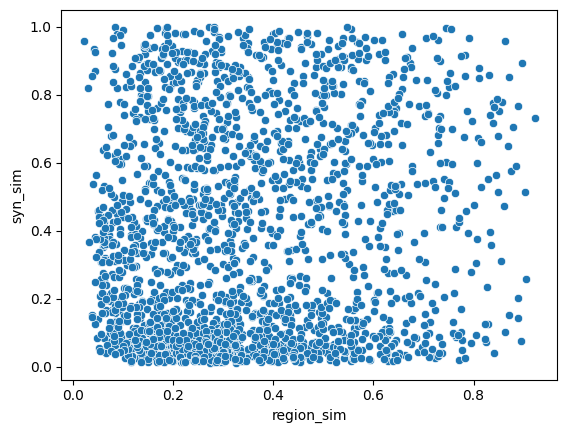

In [30]:
sns.scatterplot(data=cmp_df3, y='syn_sim', x='region_sim')

In [31]:
cmp_df4 = cmp_df3.copy() #[(cmp_df3['region_sim']>=0.16)&(cmp_df3['region_sim']<=1)].copy()
stats.pearsonr(cmp_df4['syn_sim'], 
               cmp_df4['region_sim'])

PearsonRResult(statistic=0.11662723962055725, pvalue=1.5108599512494357e-07)

In [32]:
stats.spearmanr(cmp_df4['syn_sim'], 
               cmp_df4['region_sim'])

SignificanceResult(statistic=0.09383138572048962, pvalue=2.4460800573871186e-05)